In [1]:
import pandas as pd

data_set = pd.read_csv(r'E:\[0]data_set\[0]CIC_IDS_2017\archive\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
data_set[' Label'].value_counts()

 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [4]:
import numpy as np

data_set.replace([np.inf, -np.inf], np.nan, inplace=True)
data_set.dropna(inplace=True)

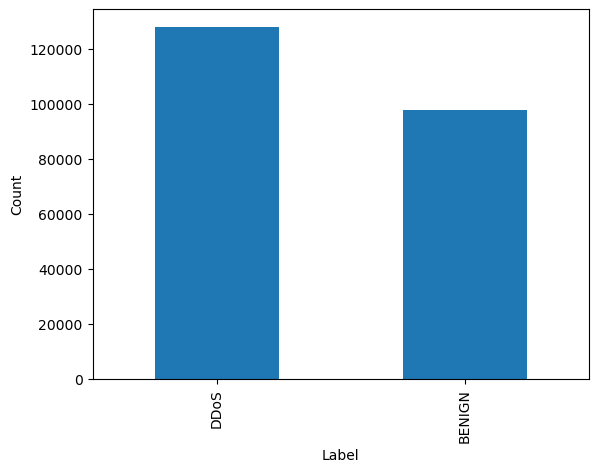

In [5]:
import matplotlib.pyplot as plt

data_set[' Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:
data_set[' Label'].value_counts()

 Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64

In [7]:
xgb_x_data = data_set.drop([' Label'], axis=1)
xgb_y_data = data_set[' Label']

In [8]:
from sklearn.model_selection import train_test_split

xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_split(xgb_x_data, xgb_y_data, test_size=0.3, random_state=42)

In [10]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix

label_encoder = LabelEncoder()

xgb_y_train_encoded = label_encoder.fit_transform(xgb_y_train)
xgb_y_test_encoded = label_encoder.transform(xgb_y_test)

model_xgb = xgb.XGBClassifier(tree_method='gpu_hist')

model_xgb.fit(xgb_x_train, xgb_y_train_encoded)

y_pred_xgb = model_xgb.predict(xgb_x_test)

y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

report_xgb = classification_report(xgb_y_test, y_pred_xgb_decoded)

accuracy_xgb = accuracy_score(xgb_y_test, y_pred_xgb_decoded)

cm_xgb = confusion_matrix(xgb_y_test, y_pred_xgb_decoded)

print(f"XGBoost accuracy : {accuracy_xgb}")
print(report_xgb)
print(f"Confusion Matrix:\n{cm_xgb}")

c:\Users\82106\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\82106\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\82106\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:20:21] WARNING: C:\buildkite-agen

XGBoost accuracy : 0.9999704640103967
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29321
        DDoS       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714

Confusion Matrix:
[[29320     1]
 [    1 38392]]


In [11]:
import shap

shap.initjs()

In [12]:
explainer = shap.Explainer(model_xgb, xgb_x_train)

In [13]:
shap_values = explainer.shap_values(xgb_x_test)

100%|===================| 67675/67714 [01:16<00:00]        

In [15]:
shap_values.shape

(67714, 78)

In [16]:
xgb_x_test.shape

(67714, 78)

In [30]:
shap_values[1]

array([ 5.50009200e-01,  2.61495829e-01,  1.17962034e-03,  4.52505076e-02,
        3.61352622e-02,  3.56932368e-02, -2.48154496e+00,  0.00000000e+00,
       -9.20472998e+00,  0.00000000e+00,  0.00000000e+00, -2.05790281e-03,
       -1.87157281e-02, -7.17997929e-01,  1.48154408e-01, -1.79862611e-01,
       -6.16204852e-02,  8.11169219e-02, -2.57783082e-01,  4.33497973e-03,
       -2.08199619e-01, -1.67485554e-01,  2.11833495e-02, -1.70845605e-01,
        5.67084077e-02,  1.40434869e-01,  0.00000000e+00,  0.00000000e+00,
       -3.38059664e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.01346480e-01, -4.20686382e-01,
       -7.36523678e-02, -7.65734863e-02,  0.00000000e+00,  0.00000000e+00,
        1.04040720e-03, -1.97647078e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.87205747e-02,
        3.76607744e-02,  0.00000000e+00,  0.00000000e+00,  7.45972294e-03,
       -4.73412421e-02,  

In [35]:
xgb_x_test.head(1)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
7447,443,5322475,6,4,611,168,517,0,101.833333,204.305082,...,5,20,109443.0,0.0,109443,109443,5213029.0,0.0,5213029,5213029


In [28]:
xgb_y_test

7447      BENIGN
220534    BENIGN
4260      BENIGN
79481       DDoS
89560       DDoS
           ...  
25885       DDoS
116511      DDoS
150466      DDoS
180111      DDoS
168128      DDoS
Name:  Label, Length: 67714, dtype: object

In [40]:
shap.force_plot(explainer.expected_value, shap_values[0], xgb_x_test.iloc[0])

In [39]:
shap.force_plot(explainer.expected_value, shap_values[3], xgb_x_test.iloc[5])

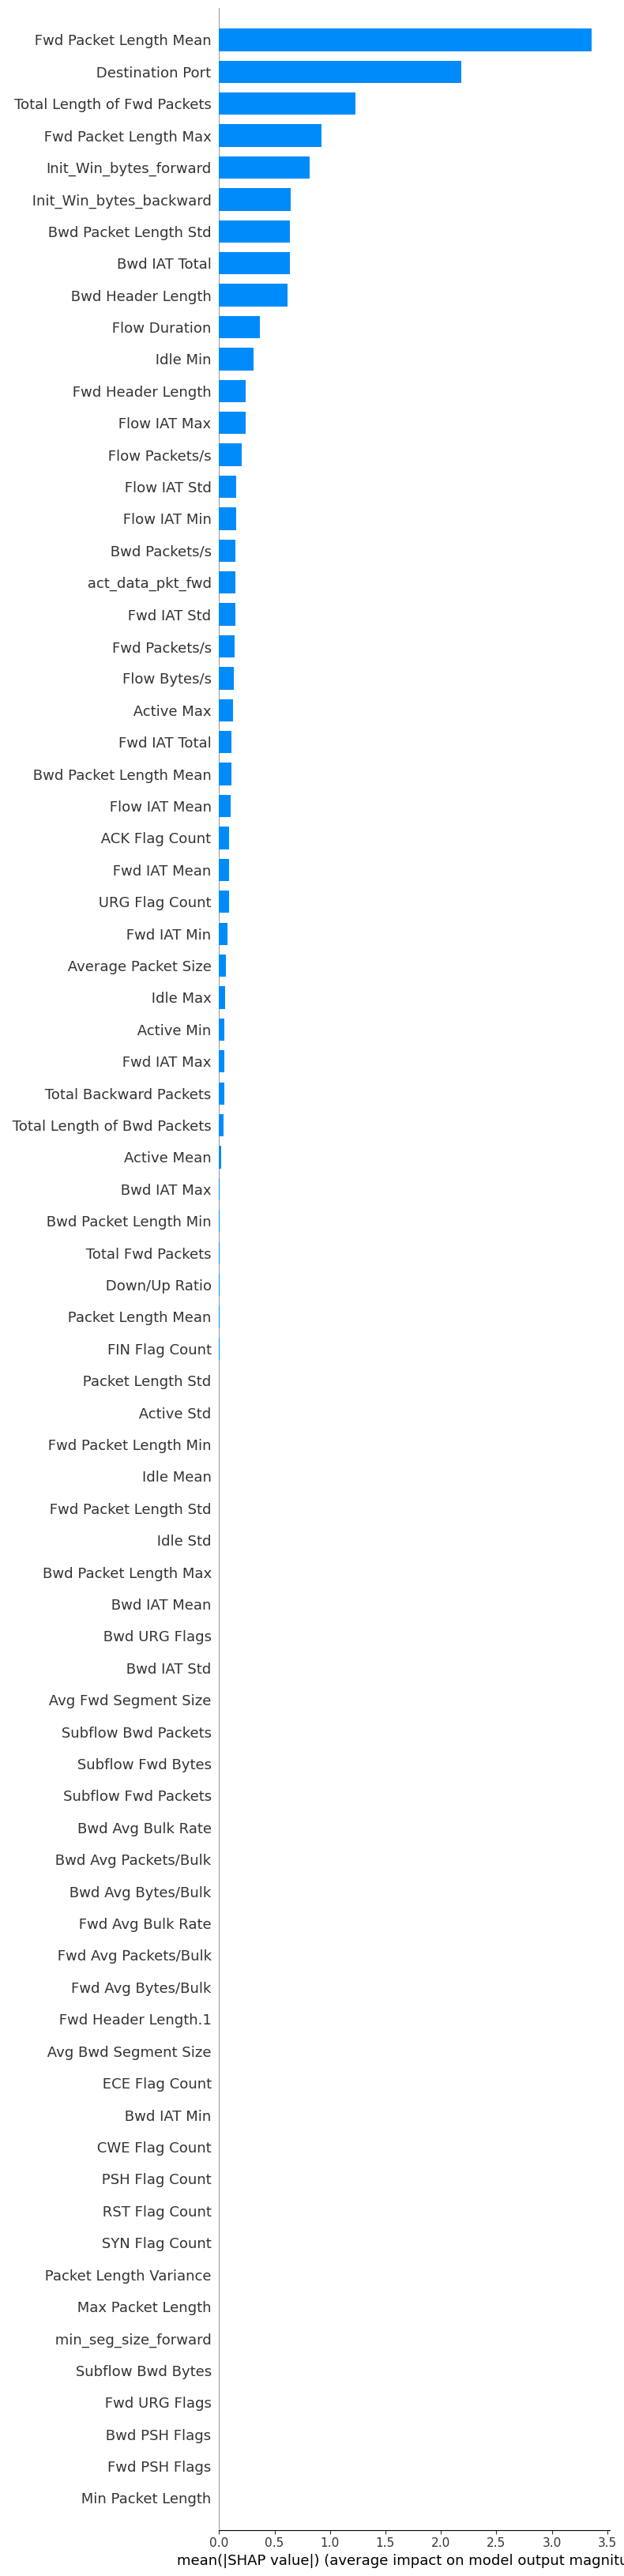

In [42]:
shap.summary_plot(shap_values, xgb_x_test, plot_type="bar", max_display=100)

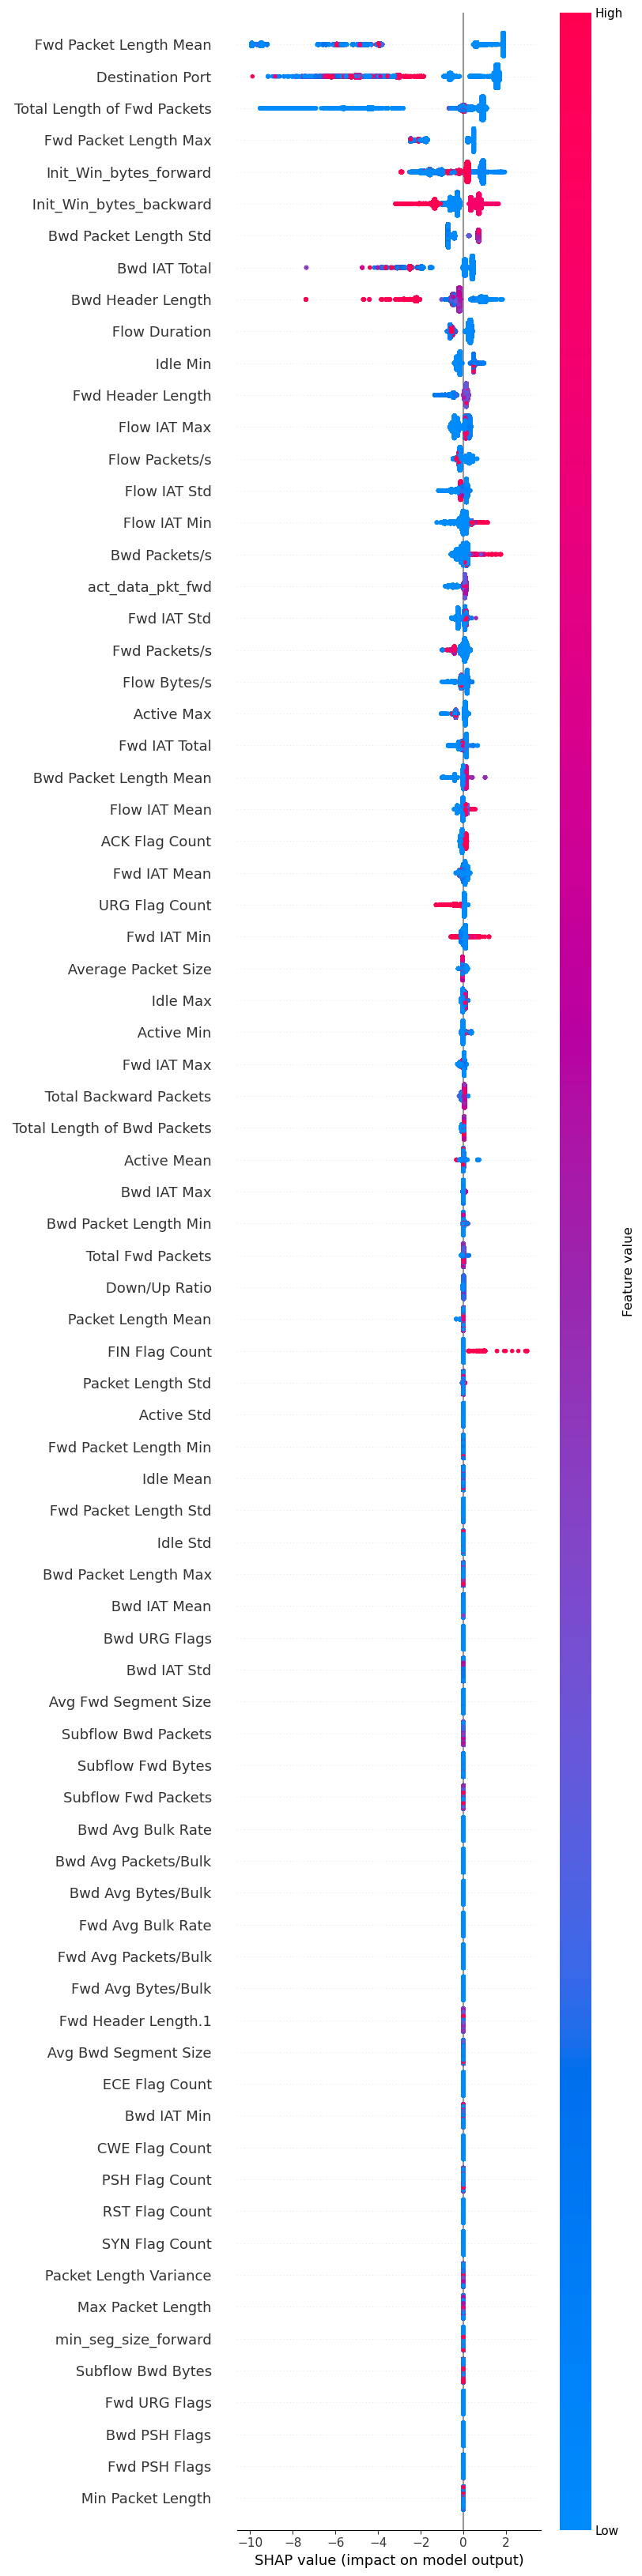

In [43]:
shap.summary_plot(shap_values, xgb_x_test, max_display=100)

In [48]:
xgb_x_test.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

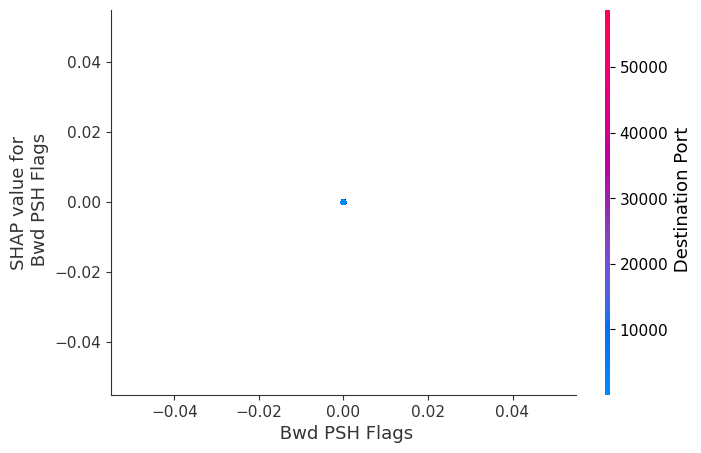

In [50]:
shap.dependence_plot(' Bwd PSH Flags', shap_values, xgb_x_test)

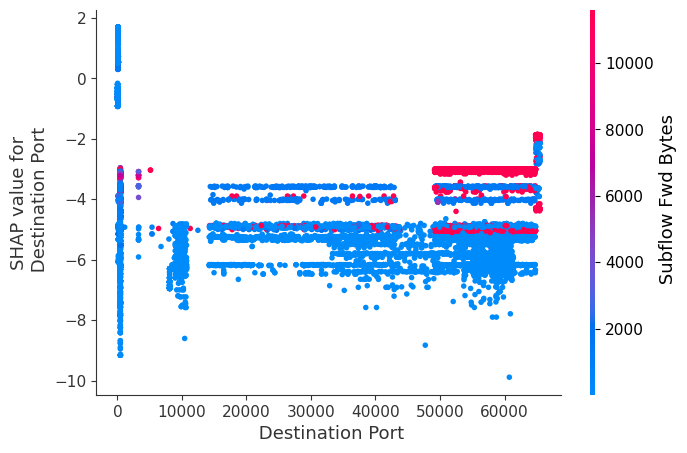

In [49]:
shap.dependence_plot(' Destination Port', shap_values, xgb_x_test)

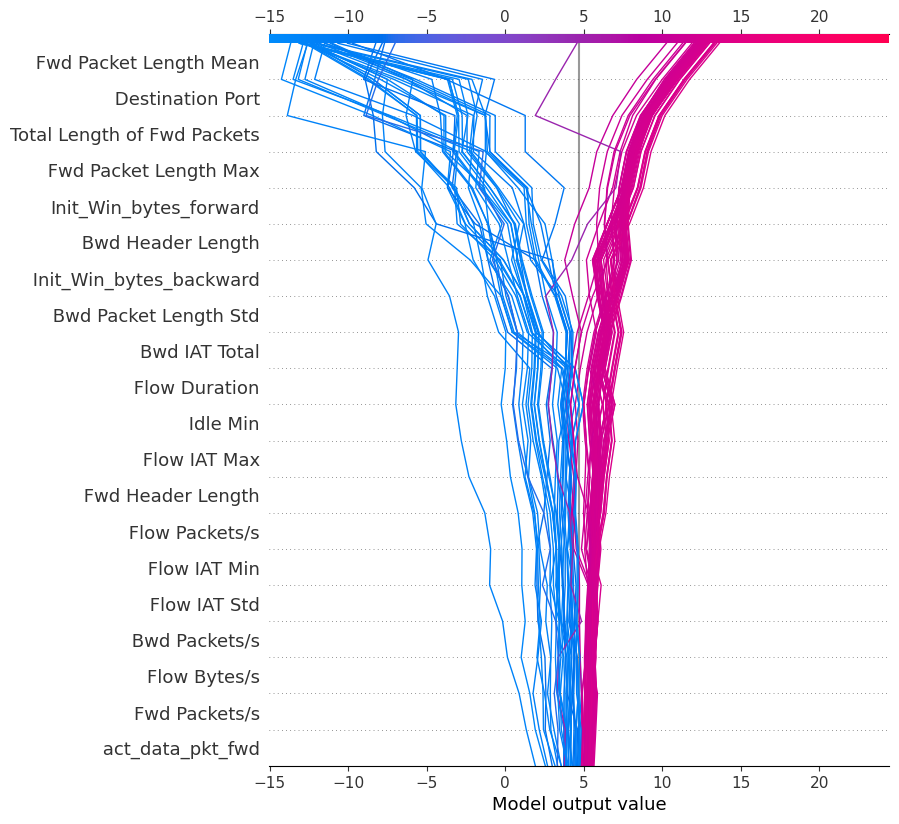

In [57]:
shap.decision_plot(explainer.expected_value, shap_values[0:100], xgb_x_test.iloc[0:100])

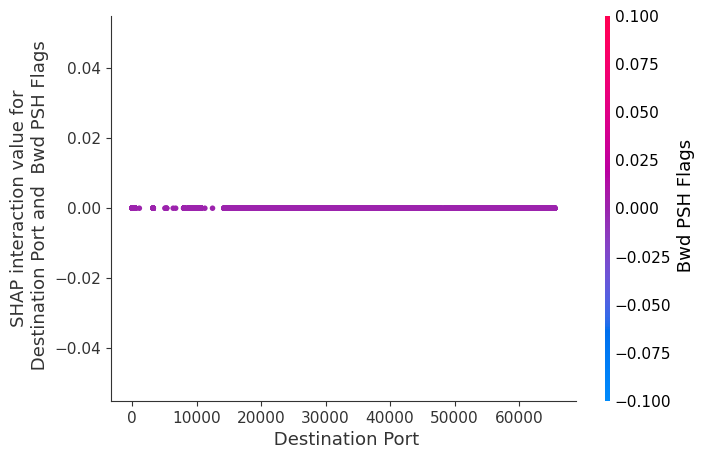

In [58]:
# Interaction values calculation
interaction_values = shap.TreeExplainer(model_xgb).shap_interaction_values(xgb_x_test)

# Interaction plot for two specific features
shap.dependence_plot((' Destination Port', ' Bwd PSH Flags'), interaction_values, xgb_x_test)

In [60]:
xgb_x_test.shape

(67714, 78)

In [62]:
shap_values.shape

(67714, 78)

In [65]:
xgb_y_test.value_counts()

 Label
DDoS      38393
BENIGN    29321
Name: count, dtype: int64

In [95]:
autoencoder_set = pd.concat([xgb_x_test, xgb_y_test], axis=1)

In [96]:
autoencoder_set

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
7447,443,5322475,6,4,611,168,517,0,101.833333,204.305082,...,20,109443.0,0.0,109443,109443,5213029.0,0.0,5213029,5213029,BENIGN
220534,80,429234,3,4,711,421,711,0,237.000000,410.496041,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4260,80,5084468,2,2,0,212,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
79481,80,878748,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
89560,80,522155,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25885,80,1104358,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
116511,80,525083,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
150466,80,755250,3,4,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
180111,80,751847,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [97]:
autoencoder_set2 = pd.concat([xgb_x_test, xgb_y_test], axis=1)

In [98]:
autoencoder_set2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
7447,443,5322475,6,4,611,168,517,0,101.833333,204.305082,...,20,109443.0,0.0,109443,109443,5213029.0,0.0,5213029,5213029,BENIGN
220534,80,429234,3,4,711,421,711,0,237.000000,410.496041,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4260,80,5084468,2,2,0,212,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
79481,80,878748,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
89560,80,522155,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25885,80,1104358,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
116511,80,525083,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
150466,80,755250,3,4,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
180111,80,751847,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [99]:
train_set1 = autoencoder_set[autoencoder_set[' Label'] == 'BENIGN']

In [100]:
train_set1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
7447,443,5322475,6,4,611,168,517,0,101.833333,204.305082,...,20,109443.00000,0.00000,109443,109443,5213029.0,0.000000e+00,5213029,5213029,BENIGN
220534,80,429234,3,4,711,421,711,0,237.000000,410.496041,...,32,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
4260,80,5084468,2,2,0,212,0,0,0.000000,0.000000,...,32,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
199828,443,4195468,5,2,123,46,46,0,24.600000,23.276598,...,32,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
206587,80,115889891,16,14,515,1780,431,0,32.187500,106.360531,...,20,61266.18182,81069.74601,305700,36657,10000000.0,4.285524e+04,10100000,9999836,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,53,24405,2,2,62,254,31,31,31.000000,0.000000,...,20,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
60739,57940,78070197,7,9,11607,62,4380,0,1658.142857,1762.272815,...,20,12916.00000,0.00000,12916,12916,38500000.0,4.130000e+07,67700000,9281725,BENIGN
138193,31591,2065223,1,6,1375,30,1375,1375,1375.000000,0.000000,...,20,0.00000,0.00000,0,0,0.0,0.000000e+00,0,0,BENIGN
129245,55101,90551596,5,10,11607,68,8760,0,2321.400000,3802.315321,...,20,16096.00000,0.00000,16096,16096,44900000.0,4.770000e+07,78600000,11200000,BENIGN


In [101]:
Label = autoencoder_set2[' Label']

In [102]:
Label

7447      BENIGN
220534    BENIGN
4260      BENIGN
79481       DDoS
89560       DDoS
           ...  
25885       DDoS
116511      DDoS
150466      DDoS
180111      DDoS
168128      DDoS
Name:  Label, Length: 67714, dtype: object

In [103]:
train_set1 = train_set1.drop([' Label'],axis=1)
autoencoder_set = autoencoder_set.drop([' Label'],axis=1)

col = autoencoder_set.columns

train_set1 = train_set1.to_numpy()
autoencoder_set = autoencoder_set.to_numpy()

In [104]:
col

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [105]:
train_set1.shape

(29321, 78)

In [106]:
autoencoder_set.shape

(67714, 78)

In [107]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve
import torch

def validate_by_rmse(rmse_vec,thres,label):
    pred = np.asarray([0] * len(rmse_vec))
    idx = np.where(rmse_vec>thres)
    pred[idx] = 1
    cnf_matrix = confusion_matrix(label, pred)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    TPR = (TP/(TP+FN))[1]
    FPR = (FP/(FP+TN))[1]
    print("TPR:",TPR,"|FPR:",FPR)

    return pred

class Normalizer:
    def __init__(self, 
            dim, 
            normer="minmax",
            online_minmax=False): # whether fit_transform online (see Kitsune), *available only for normer="minmax"

        self.dim = dim # feature dimensionality
        self.normer = normer
        if self.normer == 'minmax':
            self.online_minmax = online_minmax
            self.norm_max = [-np.Inf] * self.dim
            self.norm_min = [np.Inf] * self.dim
        else:
            raise NotImplementedError # Implement other Normalizer here
        
    def fit_transform(self,train_feat):
        if self.normer == 'minmax':
            return self._minmax_fit_transform(train_feat)
        else:
            raise NotImplementedError # Implement other Normalizer here

    def transform(self,feat):
        if self.normer == 'minmax':
            return self._minmax_transform(feat)
        else:
            raise NotImplementedError # Implement other Normalizer here

    def restore(self,feat):
        if self.normer == 'minmax':
            return self._minmax_restore(feat)
        else:
            raise NotImplementedError # Implement other Normalizer here
        
    def _minmax_fit_transform(self,train_feat):
        if not self.online_minmax:
            self.norm_min = np.min(train_feat,axis=0)
            self.norm_max = np.max(train_feat,axis=0)
            norm_feat = (train_feat - self.norm_min) / (self.norm_max-self.norm_min+1e-10)
            return norm_feat
        else:
            norm_feat = []
            self.norm_max, self.norm_min = np.asarray(self.norm_max), np.asarray(self.norm_min)
            for i in range(len(train_feat)):
                x = train_feat[i]
                self.norm_max[x>self.norm_max] = x[x>self.norm_max]
                self.norm_min[x<self.norm_min] = x[x<self.norm_min]
                norm_feat.append((x - self.norm_min) / (self.norm_max-self.norm_min+1e-10))
            return np.asarray(norm_feat)

    def _minmax_transform(self, feat):
        norm_feat = (feat - self.norm_min) / (self.norm_max-self.norm_min+1e-10)
        return norm_feat

    def _minmax_restore(self, feat):
        denorm_feat = feat * (self.norm_max-self.norm_min+1e-10) + self.norm_min
        return denorm_feat

In [108]:
normer = Normalizer(train_set1.shape[-1],online_minmax=False) 

In [109]:
train_feat_mine1 = normer.fit_transform(train_set1)

In [110]:
train_feat_mine1

array([[6.76005616e-03, 4.43539737e-02, 3.82262997e-03, ...,
        0.00000000e+00, 4.34419083e-02, 4.34419083e-02],
       [1.22077764e-03, 3.57694357e-03, 1.52905199e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.22077764e-03, 4.23705809e-02, 7.64525994e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.82069828e-01, 1.72101925e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.40825856e-01, 7.54597027e-01, 3.05810398e-03, ...,
        7.48822606e-01, 6.55000000e-01, 9.33333333e-02],
       [1.51925777e-01, 3.33333511e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [111]:
check_train = pd.DataFrame(train_feat_mine1,columns=col)
check_train

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.006760,4.435397e-02,0.003823,0.003361,0.005059,0.000065,0.044588,0.000000,0.026334,0.030527,...,0.008532,0.454545,0.001094,0.000000,0.001094,0.001094,0.043442,0.000000,0.043442,0.043442
1,0.001221,3.576944e-03,0.001529,0.003361,0.005887,0.000163,0.061320,0.000000,0.061288,0.061335,...,0.001706,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001221,4.237058e-02,0.000765,0.001681,0.000000,0.000082,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.006760,3.496224e-02,0.003058,0.001681,0.001018,0.000018,0.003967,0.000000,0.006362,0.003478,...,0.003413,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001221,9.657496e-01,0.011468,0.011765,0.004264,0.000690,0.037171,0.000000,0.008324,0.015892,...,0.025597,0.454545,0.000613,0.002052,0.003057,0.000367,0.083333,0.000673,0.084167,0.083332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29316,0.000809,2.033668e-04,0.000765,0.001681,0.000513,0.000098,0.002674,0.021060,0.008017,0.000000,...,0.001706,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29317,0.884148,6.505853e-01,0.004587,0.007563,0.096098,0.000024,0.377749,0.000000,0.428793,0.263315,...,0.008532,0.454545,0.000129,0.000000,0.000129,0.000129,0.320833,0.648352,0.564167,0.077348
29318,0.482070,1.721019e-02,0.000000,0.005042,0.011384,0.000012,0.118586,0.934103,0.355573,0.000000,...,0.000000,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29319,0.840826,7.545970e-01,0.003058,0.008403,0.096098,0.000026,0.755498,0.000000,0.600310,0.568133,...,0.005119,0.454545,0.000161,0.000000,0.000161,0.000161,0.374167,0.748823,0.655000,0.093333


In [112]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def se2rmse(a):
    return torch.sqrt(sum(a.t())/a.shape[1])


# batch_size = 128
lr = 1e-2
weight_decay = 1e-6
epoches = 5

class autoencoder(nn.Module):
    def __init__(self, feature_size):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(feature_size, int(feature_size*0.75)),
                                     nn.ReLU(True),
                                     nn.Linear(int(feature_size*0.75), int(feature_size*0.5)),
                                     nn.ReLU(True),
                                     nn.Linear(int(feature_size*0.5),int(feature_size*0.25)),
                                     )

        self.decoder = nn.Sequential(nn.Linear(int(feature_size*0.25),int(feature_size*0.5)),
                                     nn.ReLU(True),
                                     nn.Linear(int(feature_size*0.5),int(feature_size*0.75)),
                                     nn.ReLU(True),
                                     nn.Linear(int(feature_size*0.75),int(feature_size)),
                                     )
    
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return decode
    
criterion = nn.MSELoss()
getMSEvec = nn.MSELoss(reduction='none')


def train(X_train,feature_size,th_per, batch_size):
    model = autoencoder(feature_size).to(device)
    optimizier = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    model.train()

    X_train = torch.from_numpy(X_train).type(torch.float)    
    if torch.cuda.is_available(): X_train = X_train.cuda()
    torch_dataset = Data.TensorDataset(X_train, X_train)
    loader = Data.DataLoader(
        dataset=torch_dataset,
        batch_size=batch_size,
        shuffle=True,
    )

    for epoch in range(epoches):
        for step, (batch_x, batch_y) in enumerate(loader):
            output = model(batch_x)
            loss = criterion(output, batch_y)
            optimizier.zero_grad()
            loss.backward()
            optimizier.step()
            if step % 10 == 0 :
                print('epoch:{}/{}'.format(epoch,step), '|Loss:', loss.item())
    
    model.eval()
    output = model(X_train)
    mse_vec = getMSEvec(output,X_train)
    rmse_vec = se2rmse(mse_vec).cpu().data.numpy()
    
    #print(rmse_vec)

    print("max AD score",max(rmse_vec))
    thres = max(rmse_vec)
    rmse_vec.sort()
    pctg = th_per   # 99% percentage for threshold selection
    thres = rmse_vec[int(len(rmse_vec)*pctg)]
    print("thres:",thres)

    return model, thres
    
@torch.no_grad()
def test(model, thres, X_test):
    model.eval()
    X_test = torch.from_numpy(X_test).type(torch.float)    
    X_test = X_test.cuda()
#     print(X_test)
#     print(model(X_test))
    output = model(X_test)
    
    mse_vec = getMSEvec(output,X_test)
    rmse_vec = se2rmse(mse_vec).cpu().data.numpy()
    # idx_mal = np.where(rmse_vec>thres)
    # idx_ben = np.where(rmse_vec<=thres)
    # print(len(rmse_vec[idx_ben]),len(rmse_vec[idx_mal]))
    return rmse_vec

def test_plot(X_test, rmse_vec, thres):
    plt.scatter(np.linspace(0,len(X_test)-1,len(X_test)),rmse_vec,s=2)
    plt.plot(np.linspace(0,len(X_test)-1,len(X_test)),[thres]*len(X_test),c='black')
    plt.show()

In [113]:
batch = 256
th_per = 0.985

model, thres = train(train_feat_mine1, train_feat_mine1.shape[-1],th_per,batch)

epoch:0/0 |Loss: 0.05477764829993248
epoch:0/10 |Loss: 0.018248500302433968
epoch:0/20 |Loss: 0.009967883117496967
epoch:0/30 |Loss: 0.007172835059463978
epoch:0/40 |Loss: 0.006366641726344824
epoch:0/50 |Loss: 0.004124512895941734
epoch:0/60 |Loss: 0.003955821972340345
epoch:0/70 |Loss: 0.0035047249402850866
epoch:0/80 |Loss: 0.0030770152807235718
epoch:0/90 |Loss: 0.003095753025263548
epoch:0/100 |Loss: 0.0025317175313830376
epoch:0/110 |Loss: 0.002791251987218857
epoch:1/0 |Loss: 0.0018695085309445858
epoch:1/10 |Loss: 0.0022047918755561113
epoch:1/20 |Loss: 0.0014335685409605503
epoch:1/30 |Loss: 0.0016338038258254528
epoch:1/40 |Loss: 0.0015009682392701507
epoch:1/50 |Loss: 0.0017593704396858811
epoch:1/60 |Loss: 0.0012136881705373526
epoch:1/70 |Loss: 0.0015013294760137796
epoch:1/80 |Loss: 0.0010818579467013478
epoch:1/90 |Loss: 0.0011948095634579659
epoch:1/100 |Loss: 0.000974159047473222
epoch:1/110 |Loss: 0.0012994242133572698
epoch:2/0 |Loss: 0.001077338820323348
epoch:2/10 

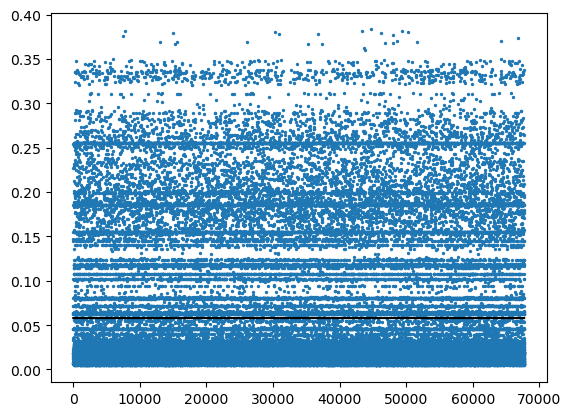

In [114]:
test_mine = normer.transform(autoencoder_set)
rmse_vec = test(model,thres,test_mine)
test_plot(test_mine, rmse_vec, thres) 

In [119]:
import matplotlib.pyplot as plt
import numpy as np

def test_plot(X_test, rmse_vec, labels, thres):
    # 라벨을 고유한 정수로 매핑
    label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
    mapped_labels = np.array([label_mapping[label] for label in labels])

    # 색상을 라벨에 따라 지정
    unique_labels = np.unique(mapped_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))  # 'tab10' 컬러맵에서 고유한 색상을 가져옴

    plt.figure(figsize=(10, 6))
    
    # 각 라벨에 대해 데이터 포인트를 시각화
    for label in unique_labels:
        mask = mapped_labels == label
        plt.scatter(np.arange(len(X_test))[mask], rmse_vec[mask], s=2, color=colors(label), label=f'Label {label}')
    
    # 임계값(threshold) 라인 시각화
    plt.plot(np.arange(len(X_test)), [thres] * len(X_test), c='black', linestyle='--')
    
    # 그래프 제목 및 축 레이블 추가
    plt.title('RMSE Values with Threshold Line')
    plt.xlabel('Sample Index')
    plt.ylabel('RMSE Value')
    
    # 범례 추가
    plt.legend(loc='upper right')
    
    # 그래프 표시
    plt.show()

C:\Users\82106\AppData\Local\Temp\ipykernel_13624\404814527.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))  # 'tab10' 컬러맵에서 고유한 색상을 가져옴


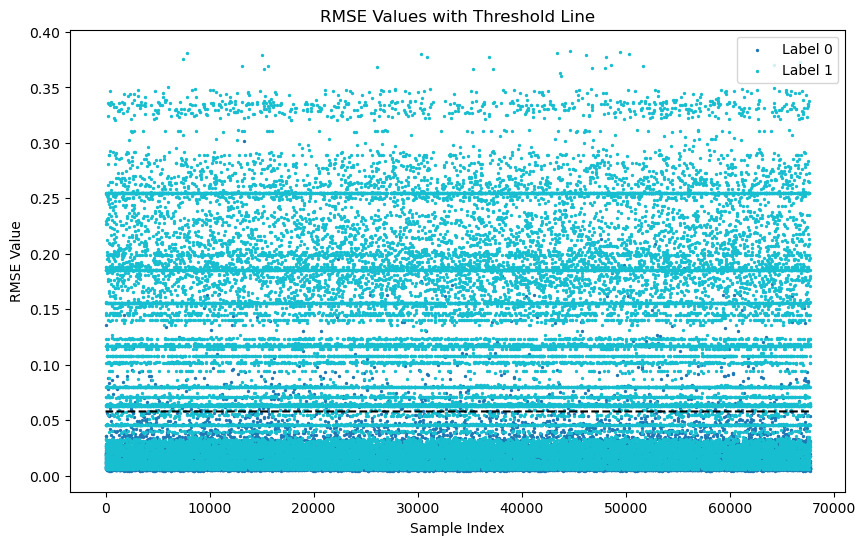

In [120]:
test_plot(autoencoder_set, rmse_vec, Label, thres)